In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import scipy.signal

# Q1. Function

In [2]:

def transform_image(image, dx=10, dy=0, angle=90, scale_x=1.0, scale_y=1.0, shear_x=1, shear_y=0):
    """
    Apply linear transformation to an input image.

    Parameters:
    - image: Input image (numpy array).
    - dx: Translation distance in the x-direction (pixels).
    - dy: Translation distance in the y-direction (pixels).
    - angle: Rotation angle (degrees) in the counterclockwise direction.
    - scale_x: Scaling factor along the x-axis.
    - scale_y: Scaling factor along the y-axis.
    - shear_x: Shearing factor along the x-axis.
    - shear_y: Shearing factor along the y-axis.

    Returns:
    - transformed_image: Transformed image (numpy array).
    """
    # Get the height and width of the image
    height, width = image.shape[:2]
    
    # Define the transformation matrix
    matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
    matrix[0, 2] += dx
    matrix[1, 2] += dy
    
    # Apply scaling
    matrix[0, 0] *= scale_x
    matrix[1, 1] *= scale_y
    
    # Apply shearing
    shear_matrix = np.array([[1, shear_x, 0],
                              [shear_y, 1, 0]])
    matrix = np.dot(matrix, np.vstack([shear_matrix, [0, 0, 1]]))
    
    # Apply the transformation to the image
    transformed_image = cv2.warpAffine(image, matrix, (width, height))
    
    return transformed_image, {'dx':dx, 'dy':dy, 'angle':angle, 'scale_x':scale_x,
                               'scale_y':scale_y, 'shear_x':shear_x, 'shear_y':shear_y}


# 2. Test the  function

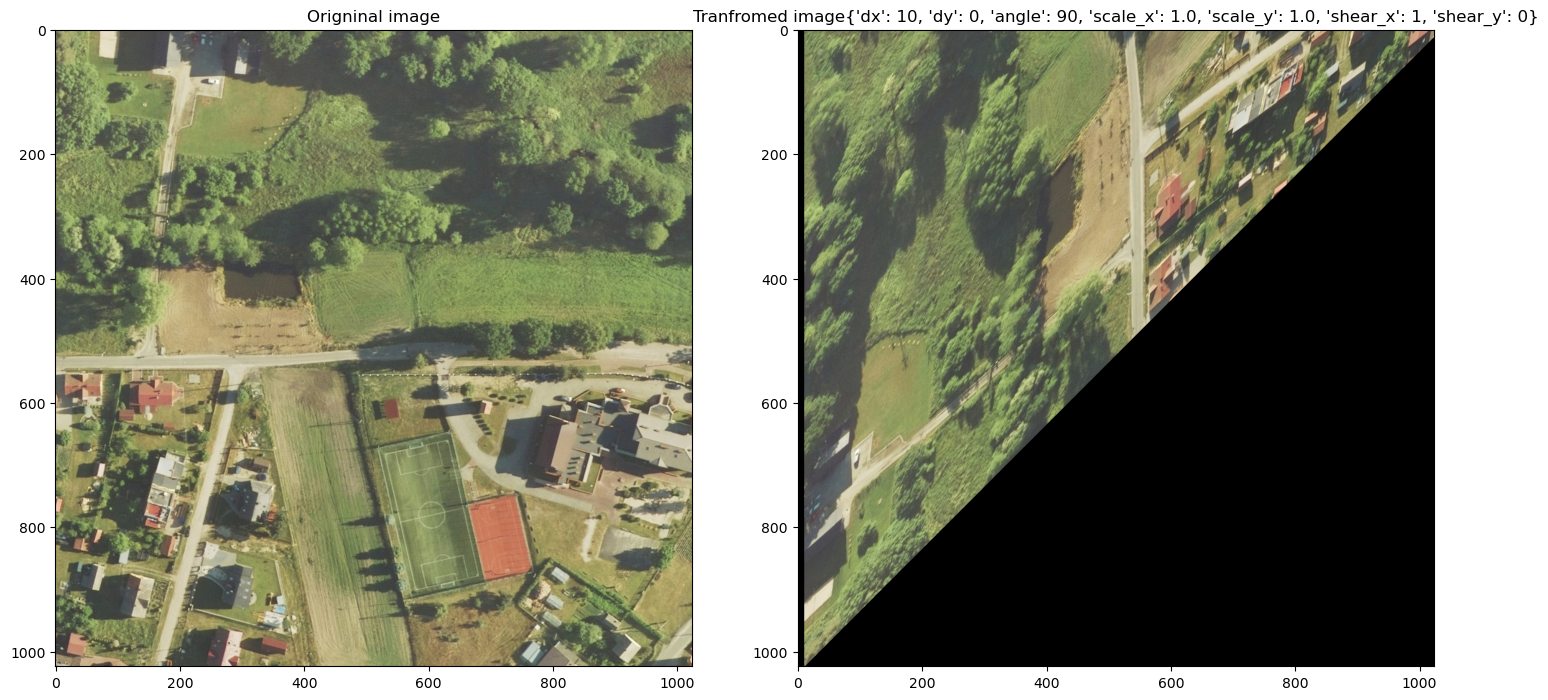

In [3]:
image = cv2.imread('Q1.TIF')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

trans_image, parms = transform_image(image)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,7))

ax[0].imshow(image)
ax[0].set_title('Origninal image')

ax[1].imshow(trans_image)
ax[1].set_title(f'Tranfromed image{parms}')

plt.tight_layout()
plt.show()



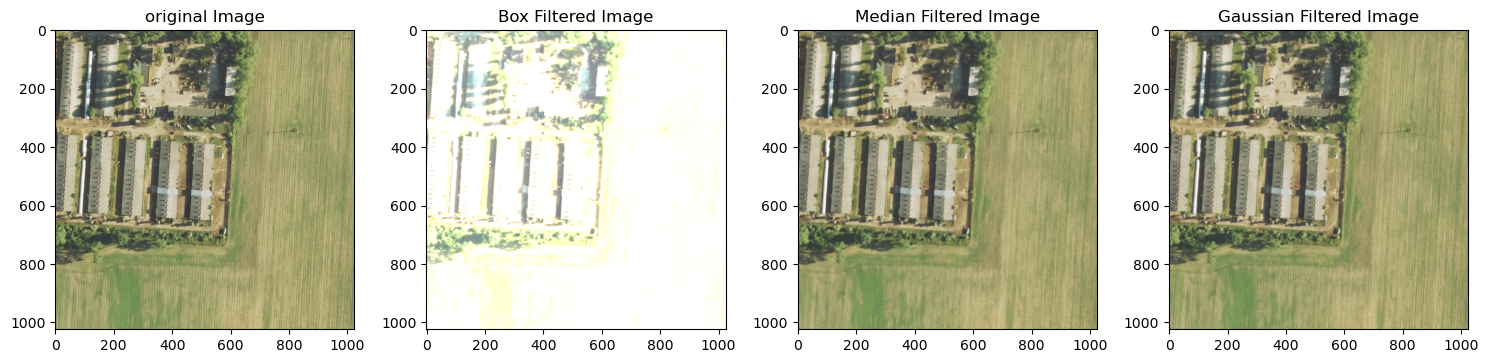

In [4]:
image2 = cv2.imread('Q2.TIF')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)


kernel = np.ones((5, 5), np.float32) / 10


fig, ax = plt.subplots(nrows= 1, ncols=4, figsize = (15,5))
plt.imshow(image2)

# Apply a 5x5 Box filter with a kernel of 0.1
# box_filtered_image = cv2.boxFilter(src = image2, ddepth = -1, ksize = (5, 5), normalize=True)
box_filtered_image = cv2.filter2D(src=image2, ddepth=-1, kernel=kernel)

# Display the original and filtered images
ax[0].imshow(image2)
ax[0].set_title('original Image')


# Display the original and filtered images
ax[1].imshow(box_filtered_image)
ax[1].set_title('Box Filtered Image')


# Apply a Median filter with a kernel size of 5x5
median_filtered_image = cv2.medianBlur(image2, 5)

# Display the original and filtered images
ax[2].imshow(median_filtered_image)
ax[2].set_title('Median Filtered Image')


# Apply a Gaussian filter with a kernel size of 5x5 and sigma value of 0 (automatic)
gaussian_filtered_image = cv2.GaussianBlur(image2, (5, 5), 1)

# Display the original and filtered images
ax[3].imshow(gaussian_filtered_image)
ax[3].set_title('Gaussian Filtered Image')

                       
plt.tight_layout()
plt.show()


In [5]:
# help(cv2.boxFilter)

# 2.3: Edges are pivotal in numerous computer vision tasks such as segmentation, feature tracking, and 3D reconstruction as they provide vital information about object details, facilitating various computer vision processes. Sobel filter is one of the popular gradient-based edge detectors.  Apply both horizontal and vertical Sobel operators to the given image and explain their operation. Discuss the effect of varying image contrast on gradient-based edge detectors like the Sobel operator.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


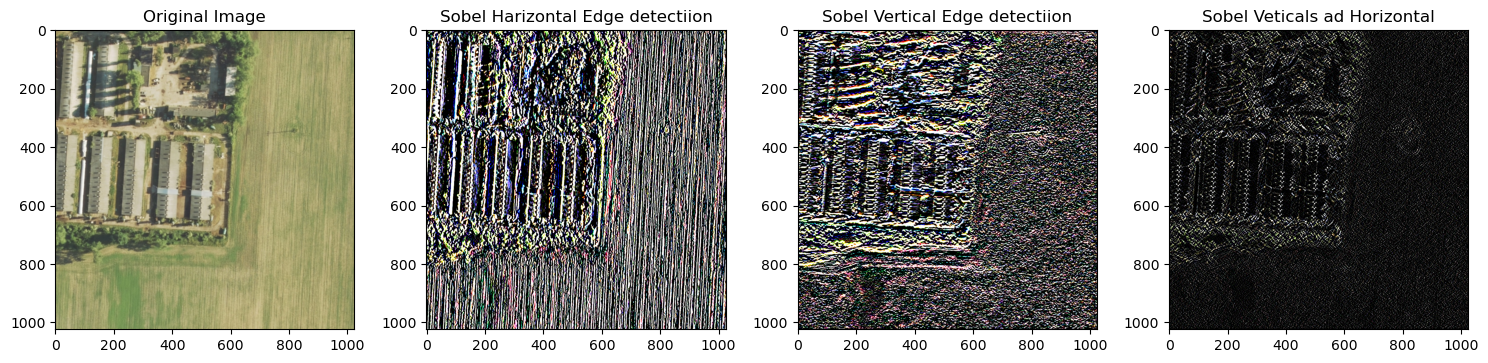

In [6]:

normalized_image = cv2.normalize(image2, None, 0, 1, cv2.NORM_MINMAX, dtype=cv2.CV_16F)

gaussian_filtered_image2 = cv2.GaussianBlur(image2, (5, 5), 1)
sobel_horizontal = cv2.Sobel(gaussian_filtered_image2, cv2.CV_16S, 1, 0, ksize=5)
sobel_vertical = cv2.Sobel(gaussian_filtered_image2, cv2.CV_16S, 0, 1, ksize=5)

fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (15,7))

ax[0].imshow(gaussian_filtered_image2, cmap = 'gray')
ax[0].set_title('Original Image')

ax[1].imshow(sobel_horizontal, cmap = 'gray')
ax[1].set_title('Sobel Harizontal Edge detectiion')

ax[2].imshow(sobel_vertical, cmap = 'gray')
ax[2].set_title('Sobel Vertical Edge detectiion')


both_xandY = cv2.Sobel(gaussian_filtered_image2, cv2.CV_16S, 1, 1, ksize=5)
ax[3].imshow(both_xandY)
ax[3].set_title('Sobel Veticals ad Horizontal')

plt.tight_layout()
plt.show()

# 4.4:  Analyze the results and assess the impact of each filtering approach on image quality and information extraction. Summarize your observations and findings.


# 3 Question: Image registration

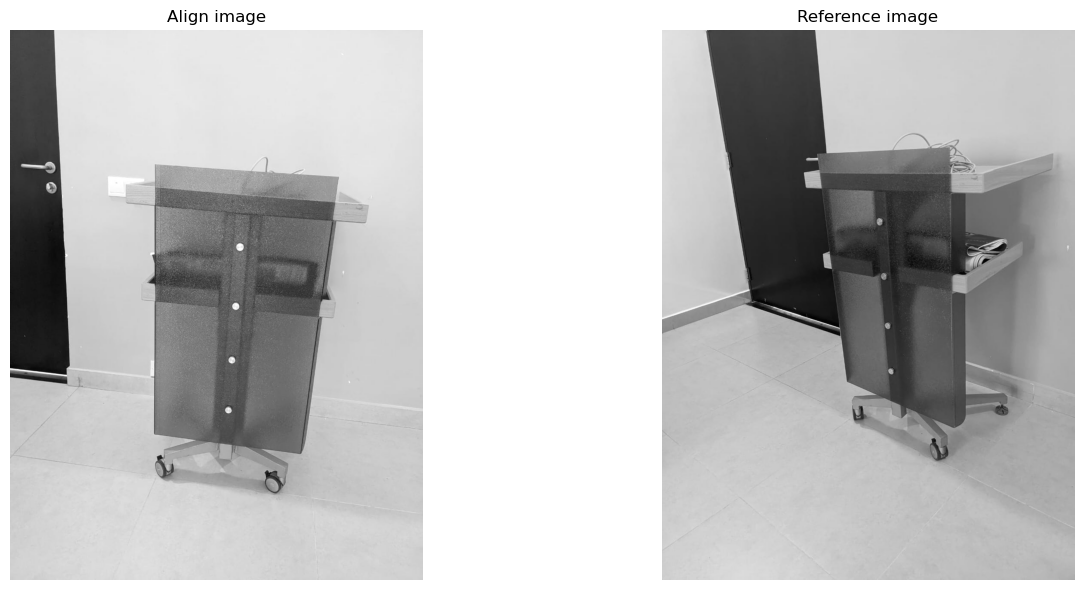

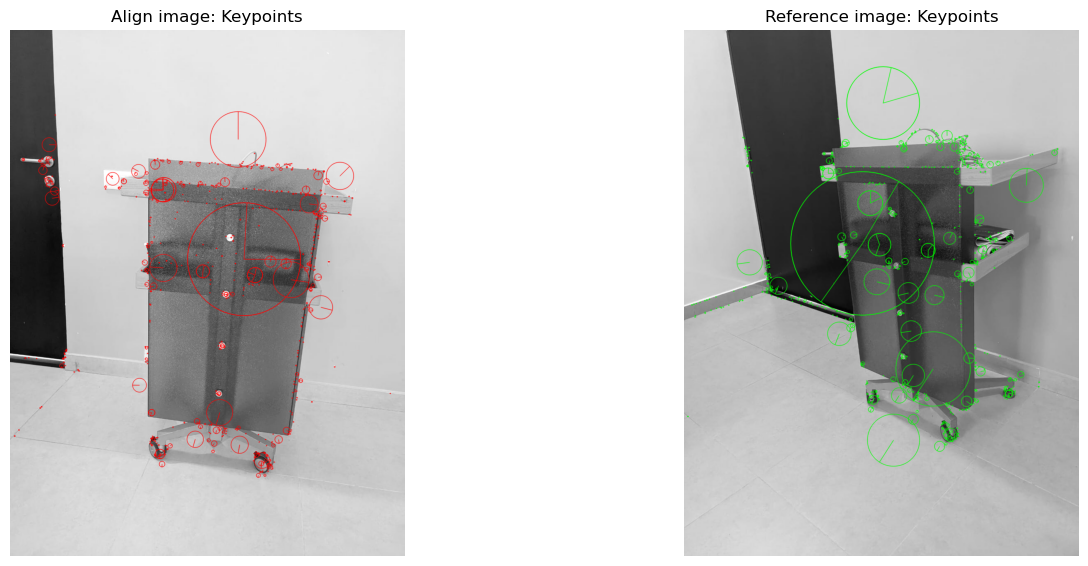

In [7]:
align_image = cv2.cvtColor(cv2.imread('Align.jpeg', 0), cv2.COLOR_BGR2RGB)
references= cv2.cvtColor(cv2.imread('Reference.jpeg', 0), cv2.COLOR_BGR2RGB)

image311 = cv2.cvtColor(align_image, cv2.COLOR_BGR2RGB)
image312 = cv2.cvtColor(references, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))

ax[0].imshow(align_image)
ax[0].set_title('Align image')
ax[0].axis(False)
ax[1].imshow(references)
ax[1].set_title('Reference image')
ax[1].axis(False)
plt.tight_layout()
plt.show()




# Convert the image to grayscale
gray1 = cv2.cvtColor(image311, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image312, cv2.COLOR_BGR2GRAY)

# Initialize the ORB detector
detector = cv2.ORB_create()
detector = cv2.SIFT_create(2500)

# Detect keypoints
keypoints1, descriptors1 = detector.detectAndCompute(gray1, None)
keypoints2, descriptors2 = detector.detectAndCompute(gray2, None)

# Draw keypoints on the image
image_with_keypoints1 = cv2.drawKeypoints(gray1, keypoints1, None, color=(255, 0, 0),
                                          flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

# Draw keypoints on the image
image_with_keypoints2 = cv2.drawKeypoints(gray2, keypoints2, None, color=(0, 255, 0),
                                          flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)


fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))

ax[0].imshow(image_with_keypoints1)
ax[0].set_title('Align image: Keypoints')

ax[1].imshow(image_with_keypoints2)
ax[1].set_title('Reference image: Keypoints')
plt.tight_layout()
ax[1].axis(False)
ax[0].axis(False)
plt.show()





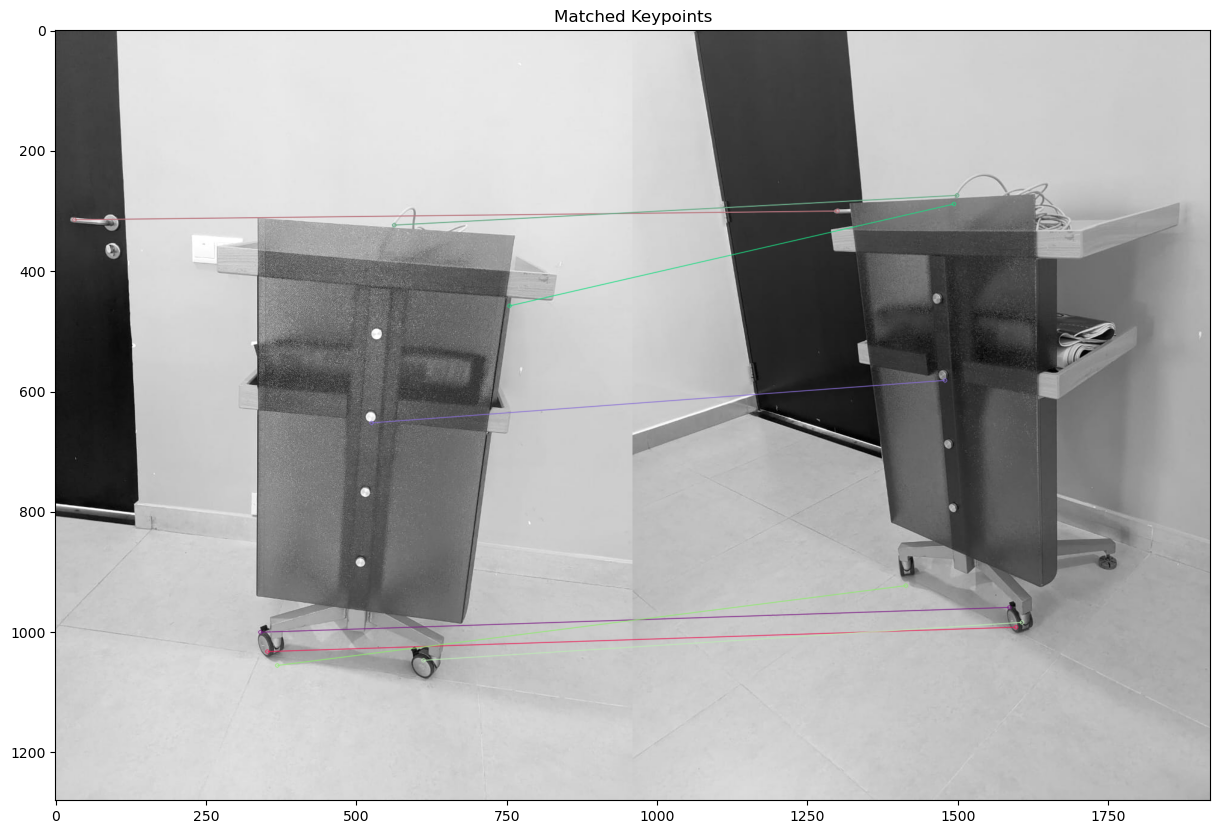

In [8]:
# Initialize the Brute-Force Matcher
bf = cv2.BFMatcher()

# Match descriptors
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

# Apply ratio test to get good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.5 * n.distance:
        good_matches.append(m)

# Draw matched keypoints
matched_image = cv2.drawMatches(gray1, keypoints1, gray2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)


plt.figure(figsize = (15,10))
# Display the matched keypoints
plt.imshow(matched_image)
plt.title('Matched Keypoints')
plt.axis(True)
plt.show()

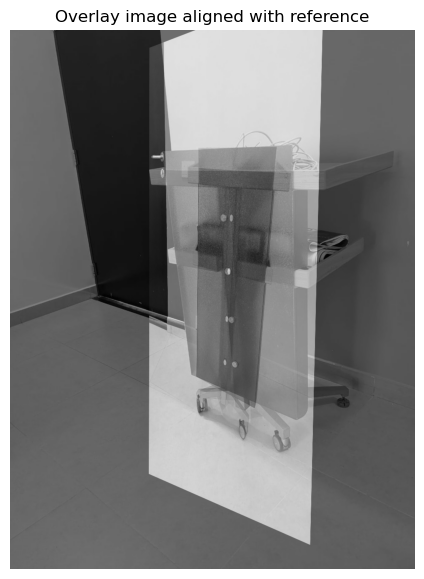

In [9]:

# Extract the coordinates of keypoints from good matches
points1 = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
points2 = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# Find homography
homography_matrix, mask = cv2.findHomography(points1, points2, cv2.RANSAC, 10.0)

# Warp image1 to image2's perspective
image1_warped = cv2.warpPerspective(align_image, homography_matrix, (references.shape[1], references.shape[0]))

# Overlay the warped image1 onto the reference image (image312)
alpha = 0.5  # Transparency factor
overlay = cv2.addWeighted(references, 1 - alpha, image1_warped, alpha, 1)

# Visualize the overlay
plt.figure(figsize=(15, 7))
plt.imshow(overlay, cmap = 'gray')
plt.title('Overlay image aligned with reference')
plt.axis(False)
plt.show()

In [10]:
references.shape

(1280, 960, 3)

# 3.2: Implement a 4-level Gaussian pyramid, and its reconstruction function indicating steps involved. Apply it to the given image and display the image at each level as well as the reconstructed image with their respective shapes.

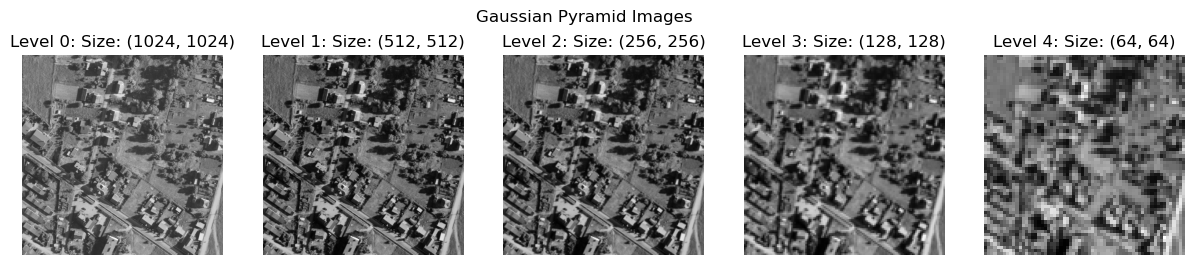

In [11]:
def generate_gaussian_pyramid(image, levels):
    """
    Generate a Gaussian pyramid from the input image.

    Parameters:
        image: Input image.
        levels: Number of pyramid levels.

    Returns:
        gaussian_pyramid: List containing images at each level of the Gaussian pyramid.
    """
    pyramid = [image] 
    for _ in range(levels):
        kernel = np.array([[0.25, 0.5, 0.25],
                           [0.5, 1.0, 0.5],
                           [0.25, 0.5, 0.25]])
        blurred = scipy.signal.convolve2d(pyramid[-1], kernel, mode='same', boundary='symm')
        downsampled = blurred[::2, ::2]
        pyramid.append(downsampled)
    return pyramid

# Load the image and convert it to grayscale
image32 = cv2.cvtColor(cv2.imread('Q3.2.TIF'), cv2.COLOR_BGR2GRAY)

# Generate the Gaussian pyramid with 4 levels
gaussian_pyramid = generate_gaussian_pyramid(image32, 4)

# Create subplots for each image in the pyramid
fig, ax = plt.subplots(nrows=1, ncols=len(gaussian_pyramid), figsize=(15, 3))

# Plot each image in the pyramid
for i, image in enumerate(gaussian_pyramid):
    ax[i].imshow(image, cmap='gray')  # Display the image
    ax[i].set_title(f'Level {i}: Size: {image.shape}')  # Set the title with image size
    ax[i].axis(False)  # Hide axis

plt.suptitle('Gaussian Pyramid Images')  # Set the general title for the figure
plt.show()  # Show the plot


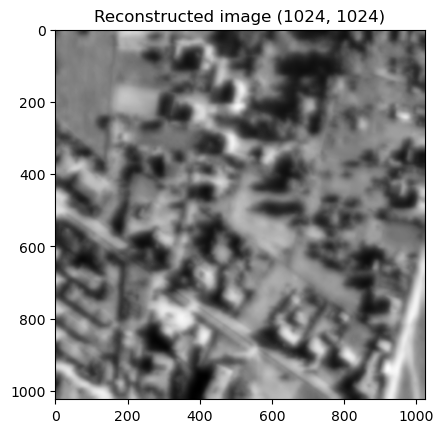

In [13]:
def reconstruct_image(gaussian_pyramid):
    """
    Reconstruct the original image from a Gaussian pyramid.

    Parameters:
        gaussian_pyramid: List containing images at each level of the Gaussian pyramid.

    Returns:
        reconstructed_image: Reconstructed image.
    """
    reconstructed_image = gaussian_pyramid[-1]  # Start with the smallest image
    for i in range(len(gaussian_pyramid) - 2, -1, -1):
        expanded = cv2.resize(reconstructed_image, (gaussian_pyramid[i].shape[1], gaussian_pyramid[i].shape[0]))
        reconstructed_image = gaussian_pyramid[i] + expanded
    return reconstructed_image

gaussian_reconstructor = reconstruct_image(gaussian_pyramid)
plt.imshow(gaussian_reconstructor, cmap='gray')
plt.title(f'Reconstructed image {gaussian_reconstructor.shape}')
plt.show()

# • Implement a 4-level Laplacian pyramid and its reconstruction function indicating all steps involved. Apply it to the given image and display the image at each level as well as the reconstructed image with their respective shapes.


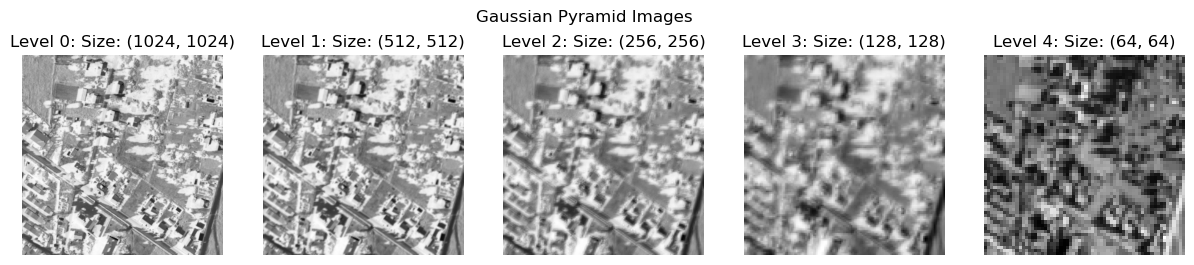

In [14]:
def generate_laplacian_pyramid(gaussian_pyramid):
    """
    Generate a Laplacian pyramid from a Gaussian pyramid.

    Parameters:
        gaussian_pyramid: List containing images at each level of the Gaussian pyramid.

    Returns:
        laplacian_pyramid: List containing images at each level of the Laplacian pyramid.
    """
    laplacian_pyramid = []
    for i in range(len(gaussian_pyramid) - 1):
        expanded = cv2.resize(gaussian_pyramid[i + 1], (gaussian_pyramid[i].shape[1], gaussian_pyramid[i].shape[0]))
        laplacian = gaussian_pyramid[i] - expanded
        laplacian_pyramid.append(laplacian)
    laplacian_pyramid.append(gaussian_pyramid[-1])  # Append the smallest image (no difference)
    return laplacian_pyramid

laplacian_pyramid = generate_laplacian_pyramid(gaussian_pyramid)
# Create subplots for each image in the pyramid
fig, ax = plt.subplots(nrows=1, ncols=len(gaussian_pyramid), figsize=(15, 3))

# Plot each image in the pyramid
for i, image in enumerate(laplacian_pyramid):
    ax[i].imshow(image, cmap='gray')  # Display the image
    ax[i].set_title(f'Level {i}: Size: {image.shape}')  # Set the title with image size
    ax[i].axis(False)  # Hide axis

plt.suptitle('Gaussian Pyramid Images')  # Set the general title for the figure
plt.show() 


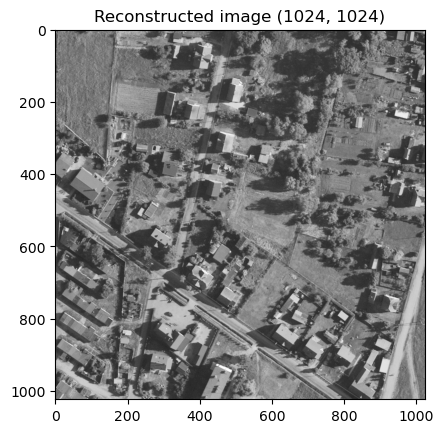

In [15]:
def reconstruct_image(laplacian_pyramid):
    """
    Reconstruct the original image from a Laplacian pyramid.

    Parameters:
        laplacian_pyramid: List containing images at each level of the Laplacian pyramid.

    Returns:
        reconstructed_image: Reconstructed image.
    """
    reconstructed_image = laplacian_pyramid[-1]  # Start with the smallest image
    for i in range(len(laplacian_pyramid) - 2, -1, -1):
        expanded = cv2.resize(reconstructed_image, (laplacian_pyramid[i].shape[1], laplacian_pyramid[i].shape[0]))
        reconstructed_image = laplacian_pyramid[i] + expanded
    return reconstructed_image

reconstructed = reconstruct_image(laplacian_pyramid)
plt.imshow(reconstructed, cmap='gray')
plt.title(f'Reconstructed image {reconstructed.shape}')
plt.show()
